In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: if your dataframe is called df and has 'predicted_topic'
# Group by topic and count documents
topic_counts = sent_df['policy_2015_centroid'].value_counts().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar')
plt.title('Number of Documents per Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'sent_df' is not defined

topic
democratie_en_bestuur    19400
arbeid                   13930
gezondheidszorg           8031
criminaliteit             5813
onderwijs                 5053
buitenlandse_zaken        2489
milieu                    1644
immigratie                 988
huisvesting                637
sociale_zaken              231
burgerrechten              130
Cultuur_en_sport             4
Name: count, dtype: int64


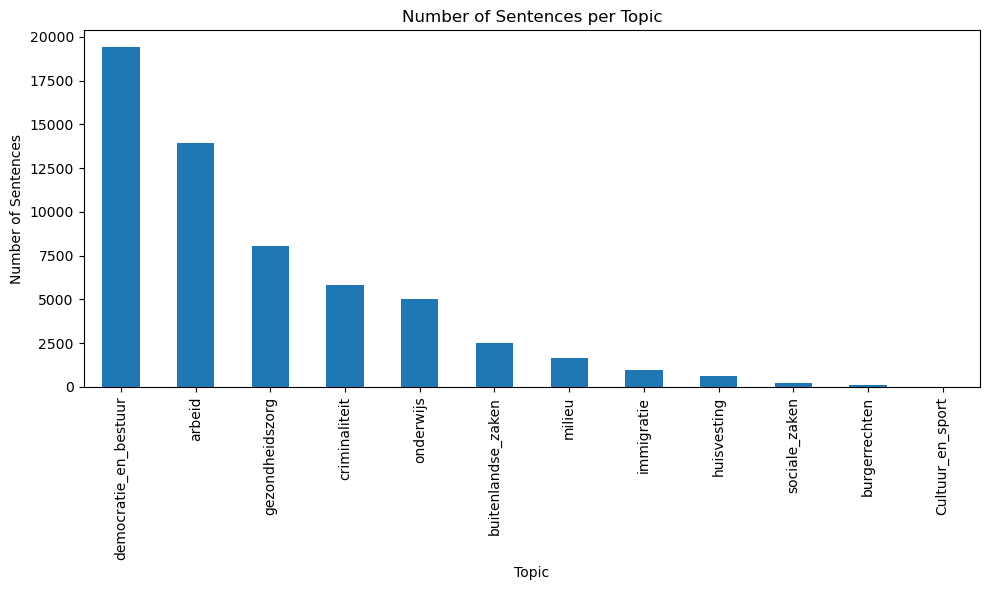

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.read_csv("bertje_policy_predictions_with_embeddings_2015.csv")

# Count number of sentences per topic
sentence_counts = results_df['topic'].value_counts().sort_values(ascending=False)
print(sentence_counts)

# Plot bar chart
plt.figure(figsize=(10, 6))
sentence_counts.plot(kind='bar')
plt.title("Number of Sentences per Topic")
plt.xlabel("Topic")
plt.ylabel("Number of Sentences")
plt.tight_layout()
plt.show()


topic
arbeid                   129
gezondheidszorg          129
democratie_en_bestuur    129
criminaliteit            129
onderwijs                128
buitenlandse_zaken       120
immigratie               111
milieu                   109
huisvesting               93
burgerrechten             43
sociale_zaken             42
Cultuur_en_sport           4
Name: document, dtype: int64


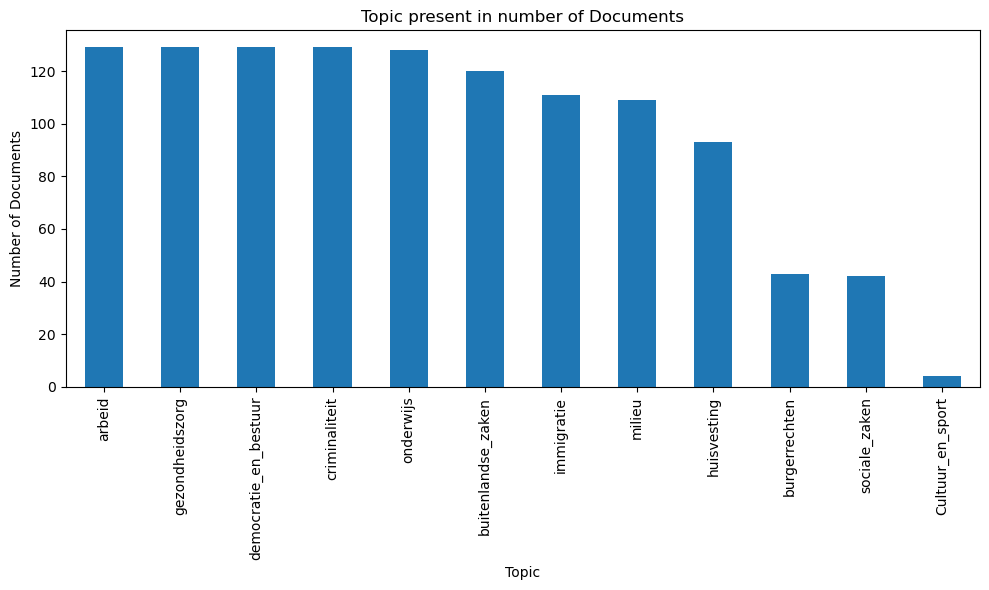

In [169]:
# Count number of unique documents per topic
doc_counts = results_df.groupby('topic')['document'].nunique().sort_values(ascending=False)
print(doc_counts)

# Plot bar chart
plt.figure(figsize=(10, 6))
doc_counts.plot(kind='bar')
plt.title("Topic present in number of Documents")
plt.xlabel("Topic")
plt.ylabel("Number of Documents")
plt.tight_layout()
plt.show()


In [170]:
import pandas as pd
import matplotlib.pyplot as plt

def get_mode_or_first(x):
    m = x.mode()
    if not m.empty:
        return m.iloc[0]
    else:
        return x.iloc[0]  # fallback if no mode

# List of topics to exclude (edit as needed)
exclude_topics = ['immigratie', 'scoiale_zaken' 
    # Example: 'Other', 'No Topic', 0, 99
]

# Step 1: Get the most common topic per document
document_topic = (
    sent_df
    .groupby('document')['topic_bertje_base']
    .agg(get_mode_or_first)
    .reset_index()
)

# Step 2: Exclude unwanted topics
filtered = document_topic[~document_topic['topic_bertje_base'].isin(exclude_topics)]

# Step 3: Count documents per topic
topic_counts = (
    filtered['topic_bertje_base']
    .value_counts()
    .sort_values(ascending=False)
)

# Step 4: Plot
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar')
plt.title('Number of Documents per Topic (Most Common Topic per Document, Filtered)')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Column not found: topic_bertje_base'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List topics to exclude here, e.g. ['irrelevant', 'misc']
excluded_topics = ['sociale_zaken', 'immigratie']  # <---- fill in

def pick_topic_excluding(group, excluded):
    # Count topic frequencies, sorted by most common
    counts = group.value_counts()
    # Find the first topic not in excluded
    for topic in counts.index:
        if topic not in excluded:
            return topic
    # If all are excluded, return None (or any marker)
    return None

# Assign a topic per document, skipping excluded ones
document_topic_filtered = (
    sent_df
    .groupby('document')['topic_bertje_base']
    .agg(lambda x: pick_topic_excluding(x, excluded_topics))
    .reset_index()
)

# Remove docs where all topics were excluded (optional)
document_topic_filtered = document_topic_filtered[document_topic_filtered['topic_bertje_base'].notna()]

topic_counts = (
    document_topic_filtered['topic_bertje_base']
    .value_counts()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar')
plt.title('Number of Documents per Topic (Excluded topics redistributed)')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [74]:
!pip install wordcloud


In [2]:
import pandas as pd

# Replace 'yourfile.csv' with the path to your CSV file
df = pd.read_csv('bertje_policy_predictions_with_embeddings.csv')

# To print the column names (variables)
print(df.columns)


Index(['document', 'sentence', 'label', 'score', 'label_int', 'topic',
       'embedding'],
      dtype='object')


In [164]:
import pandas as pd
import numpy as np
import ast

# Load datasets
df_policy = pd.read_csv('bertje_policy_predictions_with_embeddings_2015.csv')
df_slavery = pd.read_csv('bertje_slavery_predictions_with_embeddings.csv')

# Convert string embeddings to numpy arrays
def str_to_vec(s):
    # Handles embeddings stored as '[0.1, 0.2, ...]'
    return np.array(ast.literal_eval(s))

df_policy['embedding_vec'] = df_policy['embedding'].apply(str_to_vec)
df_slavery['embedding_vec'] = df_slavery['embedding'].apply(str_to_vec)


In [209]:
def topic_mean_embeddings(df, topic_col='topic', embedding_col='embedding_vec'):
    topic_vecs = {}
    for topic in df[topic_col].unique():
        embeddings = np.stack(df[df[topic_col] == topic][embedding_col])
        topic_vecs[topic] = embeddings.mean(axis=0)
    return topic_vecs

policy_topic_vecs = topic_mean_embeddings(df_policy)
slavery_topic_vecs = topic_mean_embeddings(df_slavery)


In [211]:
print(slavery_topic_vecs.keys())

dict_keys(['Historical_colonialism/Slavery'])


In [165]:
#Example: Compare "reparatie" from policy with "slavernij" from slavery:
from sklearn.metrics.pairwise import cosine_similarity

vec_policy = policy_topic_vecs['onderwijs']
vec_slavery = slavery_topic_vecs['Historical_colonialism/Slavery']

similarity = cosine_similarity([vec_policy], [vec_slavery])[0][0]
print("Cosine similarity:", similarity)


NameError: name 'policy_topic_vecs' is not defined

In [18]:
# Create a similarity matrix: policy topics vs slavery topics
policy_topics = list(policy_topic_vecs.keys())
slavery_topics = list(slavery_topic_vecs.keys())

sim_matrix = np.zeros((len(policy_topics), len(slavery_topics)))

for i, p_topic in enumerate(policy_topics):
    for j, s_topic in enumerate(slavery_topics):
        sim_matrix[i, j] = cosine_similarity(
            [policy_topic_vecs[p_topic]],
            [slavery_topic_vecs[s_topic]]
        )[0][0]

import pandas as pd
sim_df = pd.DataFrame(sim_matrix, index=policy_topics, columns=slavery_topics)
print(sim_df)


                       Historical_colonialism/Slavery
criminaliteit                                0.997274
immigratie                                   0.979094
huisvesting                                  0.919517
burgerrechten                                0.988610
buitenlandse_handel                          0.973557
arbeid                                       0.993034
democratie_en_bestuur                        0.972524
milieu                                       0.984838
religie                                      0.909004
buitenlandse_zaken                           0.937629
gezondheidszorg                              0.924010


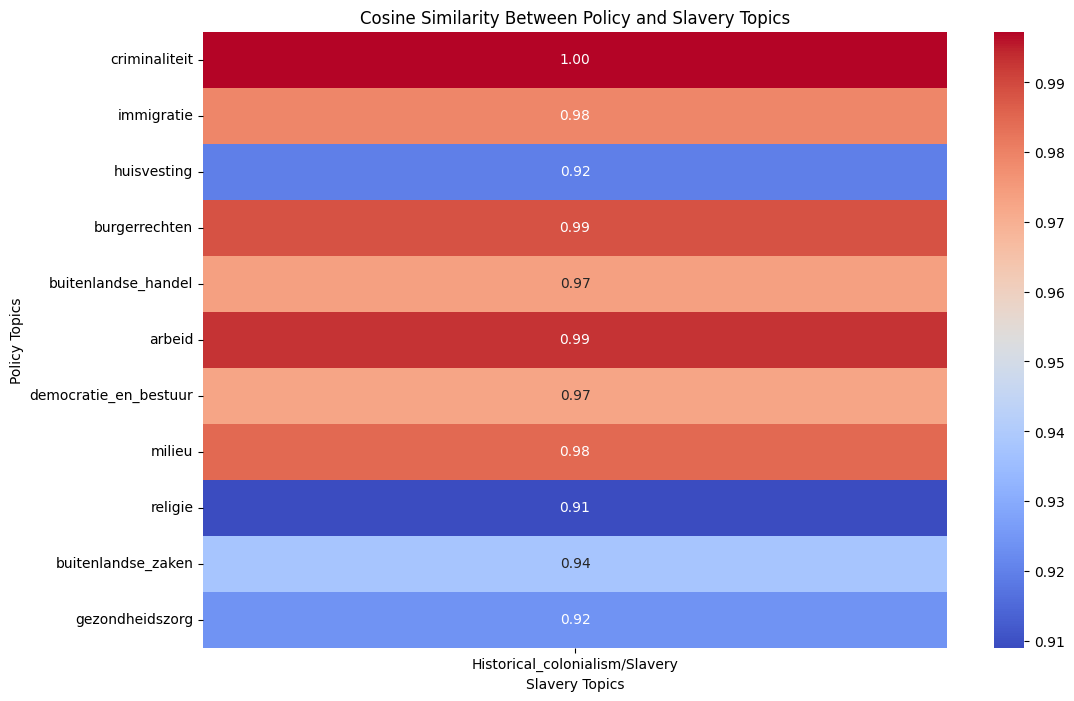

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(sim_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Cosine Similarity Between Policy and Slavery Topics")
plt.xlabel("Slavery Topics")
plt.ylabel("Policy Topics")
plt.show()


In [20]:
import pandas as pd

# Load CSVs
df_policy = pd.read_csv('bertje_policy_predictions_with_embeddings.csv')
df_slavery = pd.read_csv('bertje_slavery_predictions_with_embeddings.csv')

# Add suffix to avoid column name clashes
df_policy = df_policy.add_suffix('_policy')
df_slavery = df_slavery.add_suffix('_slavery')

# Merge on document and sentence (adjust if your columns differ)
df_merged = pd.merge(
    df_policy, df_slavery,
    left_on=['document_policy', 'sentence_policy'],
    right_on=['document_slavery', 'sentence_slavery'],
    how='inner'
)

# Confirm merge
print(df_merged[['document_policy', 'sentence_policy', 'topic_policy', 'topic_slavery']].head())


                                     document_policy sentence_policy  \
0  mariene-strategie-voor-het-nederlandse-deel-va...         Mariene   
1  mariene-strategie-voor-het-nederlandse-deel-va...         Mariene   
2  mariene-strategie-voor-het-nederlandse-deel-va...         Mariene   
3  mariene-strategie-voor-het-nederlandse-deel-va...         Mariene   
4  mariene-strategie-voor-het-nederlandse-deel-va...         Mariene   

    topic_policy                   topic_slavery  
0  criminaliteit  Historical_colonialism/Slavery  
1  criminaliteit  Historical_colonialism/Slavery  
2  criminaliteit  Historical_colonialism/Slavery  
3  criminaliteit  Historical_colonialism/Slavery  
4  criminaliteit  Historical_colonialism/Slavery  


In [21]:
    # Get unique topics and create mappings
policy_topics = df_merged['topic_policy'].unique()
slavery_topics = df_merged['topic_slavery'].unique()

policy_topic_to_num = {t: i for i, t in enumerate(policy_topics)}
slavery_topic_to_num = {t: i for i, t in enumerate(slavery_topics)}

# Add numeric columns
df_merged['policy_topic_num'] = df_merged['topic_policy'].map(policy_topic_to_num)
df_merged['slavery_topic_num'] = df_merged['topic_slavery'].map(slavery_topic_to_num)


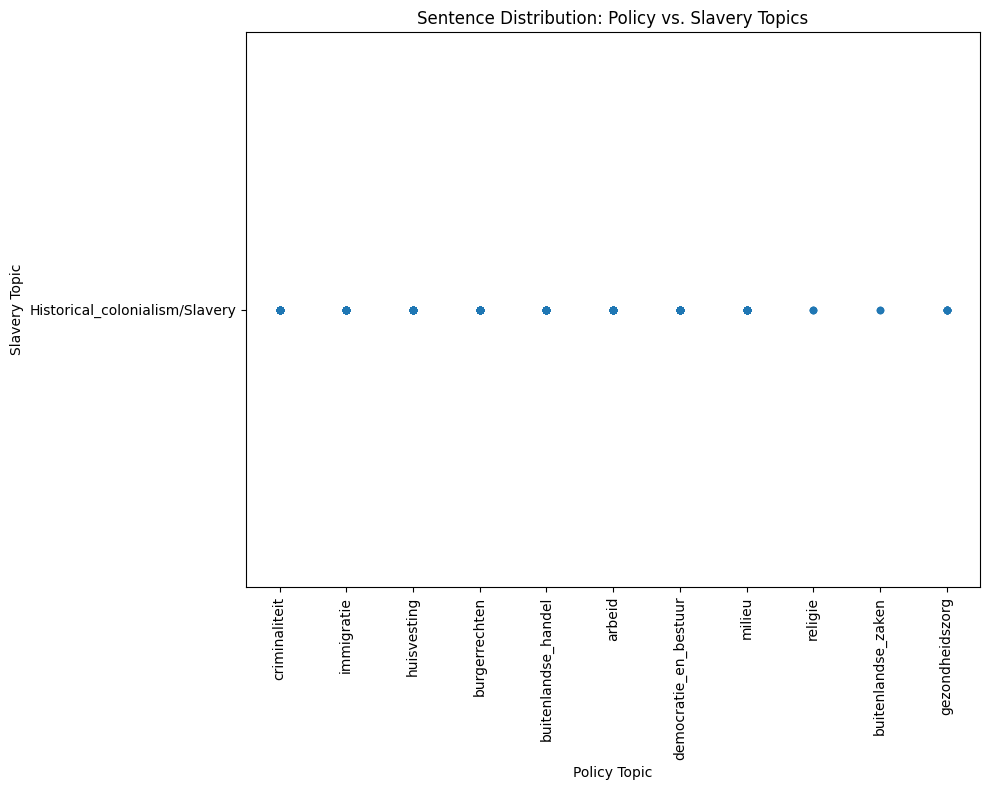

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(
    df_merged['policy_topic_num'],
    df_merged['slavery_topic_num'],
    alpha=0.5,
    s=20
)
plt.xticks(list(policy_topic_to_num.values()), list(policy_topic_to_num.keys()), rotation=90)
plt.yticks(list(slavery_topic_to_num.values()), list(slavery_topic_to_num.keys()))
plt.xlabel("Policy Topic")
plt.ylabel("Slavery Topic")
plt.title("Sentence Distribution: Policy vs. Slavery Topics")
plt.tight_layout()
plt.show()filename


In [154]:
print("Available document names:")
for doc in sorted(results_df['document'].unique()):
    print(doc)


Available document names:
0-1-financieel-jaarverslag-van-het-rijk-2014.pdf
0-2-internetbijlagen-bij-het-fjr-2014.pdf
10-defensie.pdf
12-infrastructuur-en-milieu.pdf
13-economische-zaken.pdf
14e-uitvoeringsrapportage-sdkk.pdf
15-sociale-zaken-en-werkgelegenheid.pdf
150604-maritieme-strategie-lr-2.pdf
16-de-duurzame-relatie-tussen-gerechtsdeurwaardersmarkt-en-rijksoverheid.pdf
16-volksgezondheid-welzijn-en-sport.pdf
17-buitenlandse-handel.pdf
2b-hoge-colleges-van-staat.pdf
4-koninkrijksrelaties.pdf
5-buitenlandse-zaken.pdf
6-veiligheid-en-justitie.pdf
7-binnenlandse-zaken-en-koninkrijksrelaties.pdf
8-onderwijs-cultuur-en-wetenschap.pdf
9-financien.pdf
RR2015.pdf
acs-eu-samenwerking-na-2020-op-weg-naar-een-nieuw-partnerschap.pdf
actieplan-kinderrechten-st-eustatius.pdf
advies-wisselwerking.pdf
aivd-jaarverslag-2014-220415.pdf
beleidsdoorlichting-en-evaluatie-artikel-4-1-positie-van-de-client.pdf
beleidsdoorlichting-natuur-en-regio.pdf
beleidsdoorlichting-ziektepreventie.pdf
besluit-wobver

In [46]:
import pandas as pd

# Load results
results_df = pd.read_csv("bertje_policy_predictions_with_embeddings_2023.csv")

# Optional: Make sure all needed columns are str
results_df['document'] = results_df['document'].astype(str)
results_df['sentence'] = results_df['sentence'].astype(str)
results_df['topic'] = results_df['topic'].astype(str)

# Optionally, sort topics to have a consistent color mapping
unique_topics = results_df['topic'].unique()
topic2color = {topic: f"hsl({i * 360 // len(unique_topics)},70%,80%)" for i, topic in enumerate(unique_topics)}


In [149]:
# Assumes you have results_df with columns: 'document', 'sentence', 'topic', 'score'

sentence_matches = {}
for _, row in results_df.iterrows():
    doc = row['document']
    if pd.isna(row['sentence']) or pd.isna(row['topic']):
        continue
    match = {
        'sentence': row['sentence'].strip(),
        'topic': str(row['topic']),
        'score': float(row['score']),
    }
    sentence_matches.setdefault(doc, []).append(match)


In [151]:
# If policy_df uses 'filename', rename it for consistency:
unseen_policy_df = unseen_policy_df.rename(columns={'filename': 'document'})

# Make sure 'document' column is string type for reliable matching
unseen_policy_df['document'] = unseen_policy_df['document'].astype(str)

# Create a lookup dict: document_id → clean_text
doc_text_lookup = dict(zip(unseen_policy_df['document'], unseen_policy_df['clean_text']))


In [158]:
from IPython.display import display, HTML
import html
import random
import spacy

# For reproducible color mapping
random.seed(42)

# Generate topic colors
topic_keys = sorted(set(m['topic'] for matches in sentence_matches.values() for m in matches))
topic_colors = {topic: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for topic in topic_keys}

# SpaCy sentence splitter
nlp = spacy.blank("nl")
nlp.add_pipe("sentencizer")

# SpaCy sentence splitter
nlp = spacy.blank("nl")
nlp.add_pipe("sentencizer")

# Highlight function for embedding mode
def highlight_document(doc_id):
    # Lookup clean_text directly from the dictionary
    full_text = doc_text_lookup.get(str(doc_id), None)
    if not full_text or pd.isna(full_text):
        return "<b style='color:red'>No text available for this document.</b>"
    matches = sentence_matches.get(doc_id, [])
    matched_sents = {(m['sentence'].strip(), m['topic'], m.get('score', 0.0)) for m in matches}
    sents = [sent.text.strip() for sent in nlp(full_text).sents]

    result = []
    for sent in sents:
        found = False
        for matched_sent, matched_topic, score in matched_sents:
            if sent == matched_sent:
                rgba_color = topic_colors[matched_topic] + "33"
                tooltip = f"{matched_topic} ({score:.2f})"
                result.append(
                    f'<span style="background-color:{rgba_color};" title="{html.escape(tooltip)}">'
                    f'{html.escape(sent)}</span>'
                )
                found = True
                break
        if not found:
            result.append(html.escape(sent))
    return ' '.join(result)
# ---- Just set the doc_id here! ----
doc_id = "vijf-jaar-caribisch-nederland-gevolgen-voor-de-bevolking.pdf"  # <-- Replace with your document name/key

# ---- Display ----
display(HTML(f"<div style='font-family:sans-serif; line-height:1.5;'>{highlight_document(doc_id)}</div>"))


In [39]:
document_id = input("Enter document name: ")


def highlight_document(document_id):
    doc_df = results_df[results_df['document'] == document_id]
    html = "<div style='line-height:1.8;'>"
    for _, row in doc_df.iterrows():
        color = topic2color[row['topic']]
        html += f"<span style='background-color:{color};padding:2px 4px;border-radius:4px;margin:2px;'><b>{row['topic']}:</b> {row['sentence']}</span><br>"
    html += "</div>"
    display(HTML(html))

highlight_document(document_id)


Enter document name:  Ramingstoelichtingen en certificering.pdf


In [44]:
print(results_df.columns)


Index(['document', 'sentence', 'label', 'score', 'label_int', 'topic',
       'embedding'],
      dtype='object')


In [161]:
custom_stopwords = set([
    # General connectors & prepositions
    "de", "het", "een", "en", "van", "in", "op", "met", "voor", "tegen", "zonder", "bij",
    "naar", "tot", "uit", "door", "aan", "om", "te", "als", "ook", "maar", "want", "dus", 
    "of", "dan", "nog", "wel", "zijn", "is", "was", "waren", "worden", "hebben", "heeft", "had", 
    "doet", "doen", "al", "alle", "meer", "minder", "veel", "weinig", "binnen", "buiten",
    "tussen", "onder", "boven", "over", "na", "voor", "achter", "naast", "sinds", "tijdens", "zoals",

    # Pronouns & common references
    "ik", "jij", "hij", "zij", "wij", "jullie", "u", "je", "ze", "dit", "dat", "die", "deze", "welke",
    "ons", "hun", "hem", "haar", "ons", "onszelf", "hunzelf", "jouw", "mijn", "jullie",

    # Common report/metadata words seen in clouds
    "bijlage", "bijlagen", "inleiding", "samenvatting", "conclusie", "conclusies", "tabel",
    "groep", "project", "organisatie", "onderdeel", "onderzoek", "overzicht", "resultaten", "resultaat",
    "aantal", "totaal", "deel", "delen", "vraag", "vragen", "antwoord", "antwoorden", "rapport", "rapportage", "toelichting",
    "nullmeting", "nulmeting", "meeting", "metingen", "maatregel", "maatregelen", "jaar", "jaren",
    "gegeven", "gegevens", "gebruik", "gebruikt", "onderwijs", "beleid", "beleidsterrein", "beleidsveld", "beleidsnota",
    "onderzoek", "onderzoeken", "onderzoeker", "onderzoekers", "onderzoeksmethoden",
    "case", "cases", "onderwerpen", "onderwerp", "uitkomst", "uitkomsten", "projecten", "projectgroep", "projectleider",
    "toezicht", "inspectie", "inspecties", "toelichting", "leeswijzer", "artikel", "artikelen", "bijdrage", "doel", "doelen",

    # Government and organization-specific
    "ministerie", "minister", "ministers", "bz", "bzkt", "bzkr", "bzks", "bz", "kw", "kwb", "saba", "bonaire", 
    "statia", "statian", "statiae", "statians", "eustatius", "st", "sint", "cn", "bes", "bes-eilanden", "bes eilanden",
    "caribisch", "caribische", "nederland", "nederlandse", "rijksoverheid", "overheid", "publiek", "publieke",
    "inspectie", "audit", "audits", "commissie", "commissies", "toezicht",
    "samenvatting", "overzicht", "tabel", "tabellen", "bijlage", "bijlagen",

    # Document workflow
    "bijlage", "bijlagen", "blz", "pagina", "paginas", "pagina’s", "hoofdstuk", "hoofdstukken", "paragraaf", "paragrafen",
    "figuur", "figuren", "schema", "schema’s", "grafiek", "grafieken", "afbeelding", "afbeeldingen",

    # Common non-content words from clouds
    "niet", "wel", "geen", "wordt", "worden", "zijn", "is", "was", "zal", "kunnen", "kun", "moet", "moeten",
    "mag", "mogen", "dient", "dienen", "blijft", "blijven", "heeft", "hebben", "kan", "kunnen", "alleen", "samen", "tijdens",

    # Months, dates
    "januari", "februari", "maart", "april", "mei", "juni", "juli", "augustus", "september", "oktober", "november", "december",

    # Miscellaneous observed
    "bijlage", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "t", "st",
    "overzicht", "samenvatting", "bijlage", "bijlagen"
])
# Add any more you want!



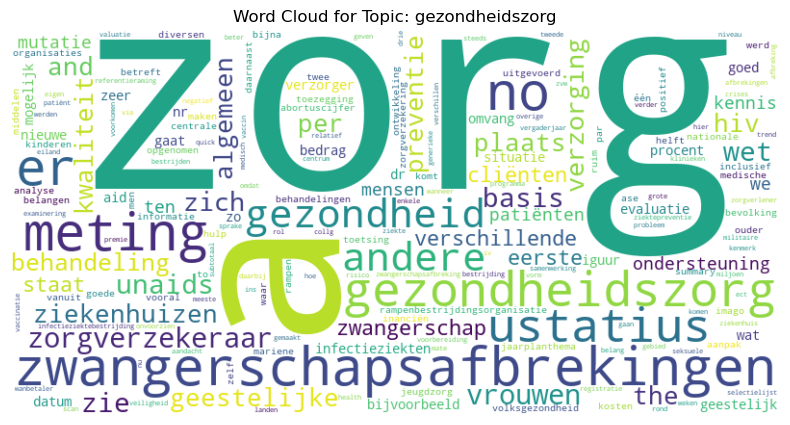

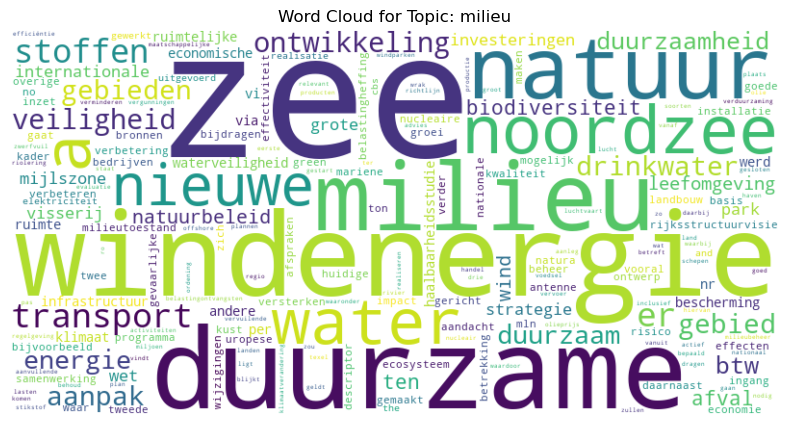

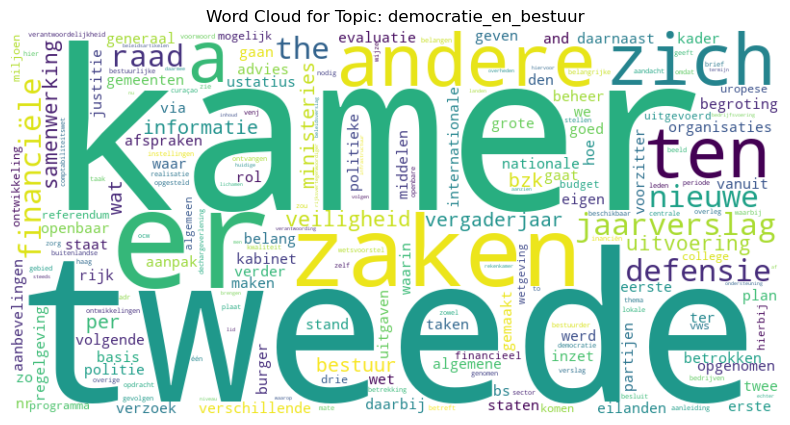

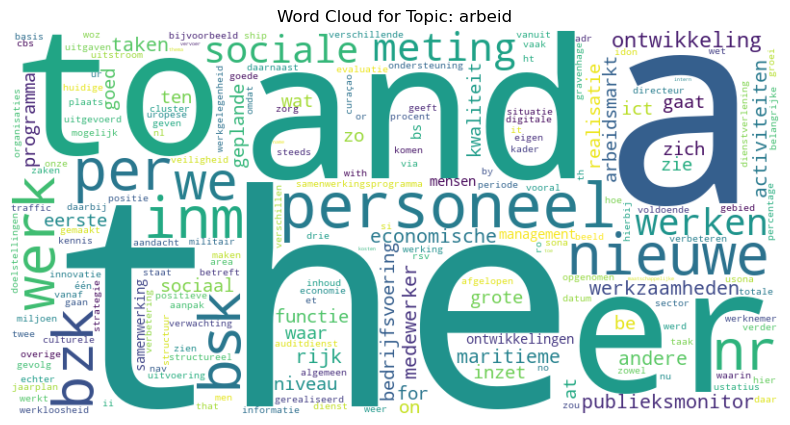

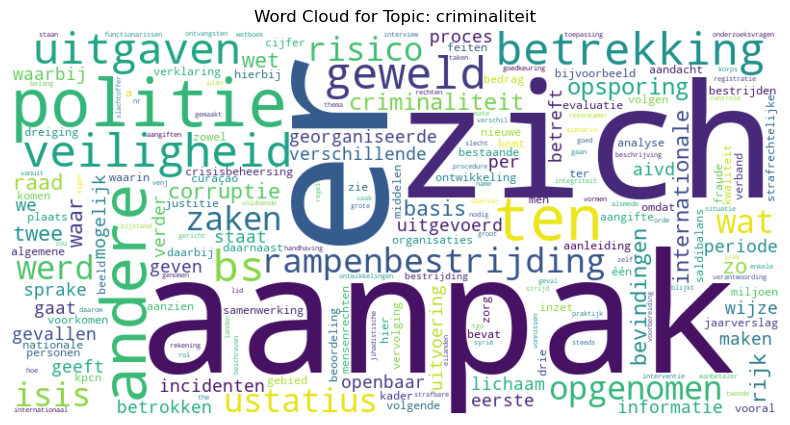

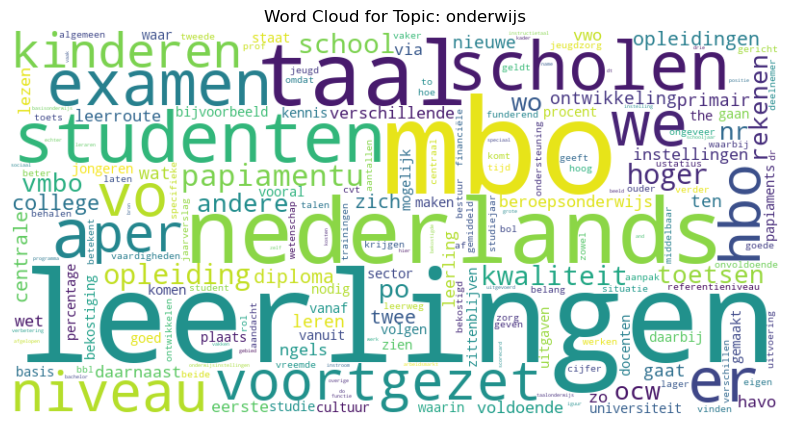

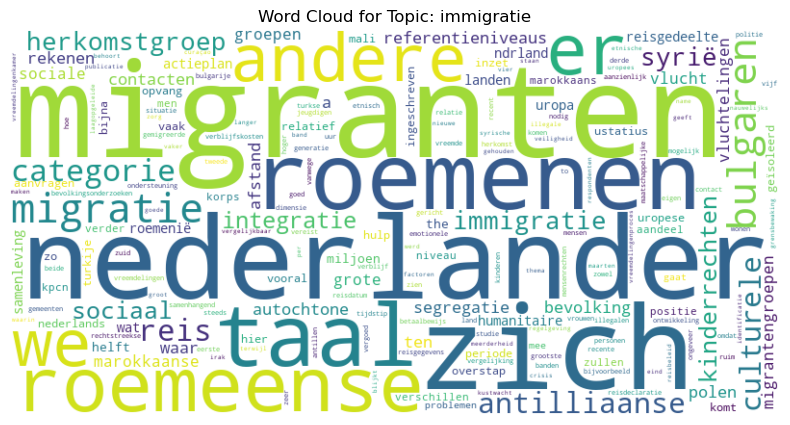

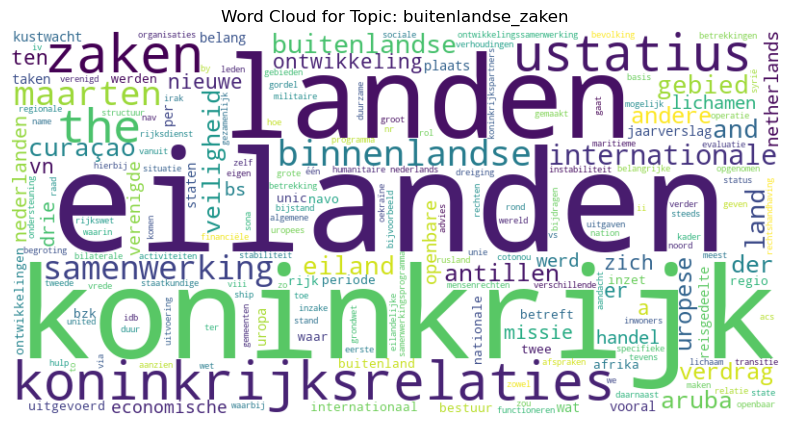

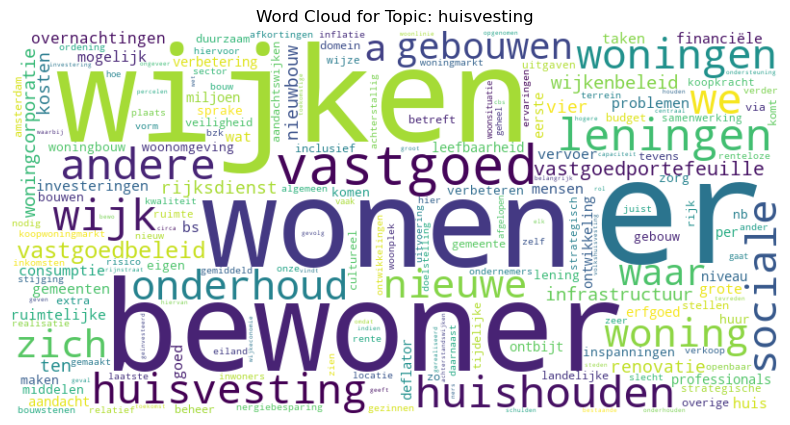

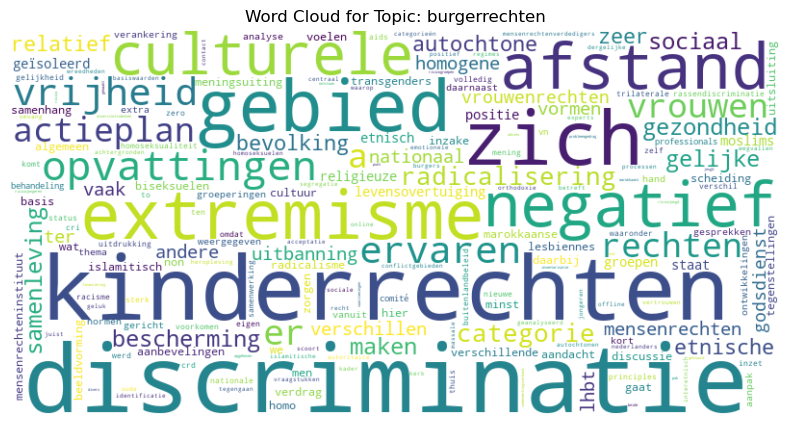

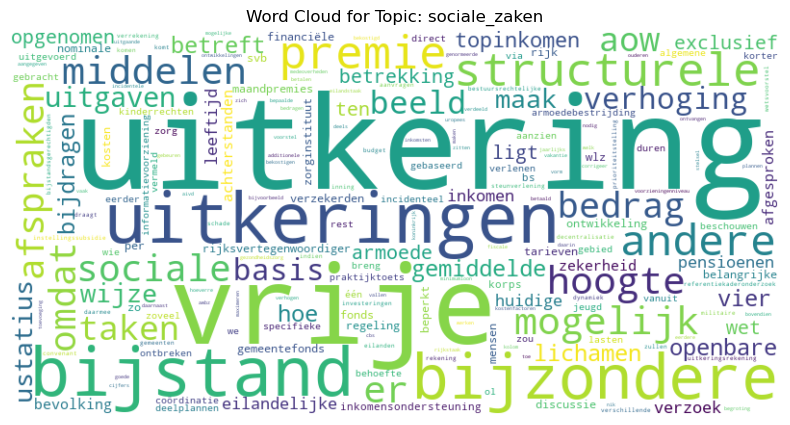

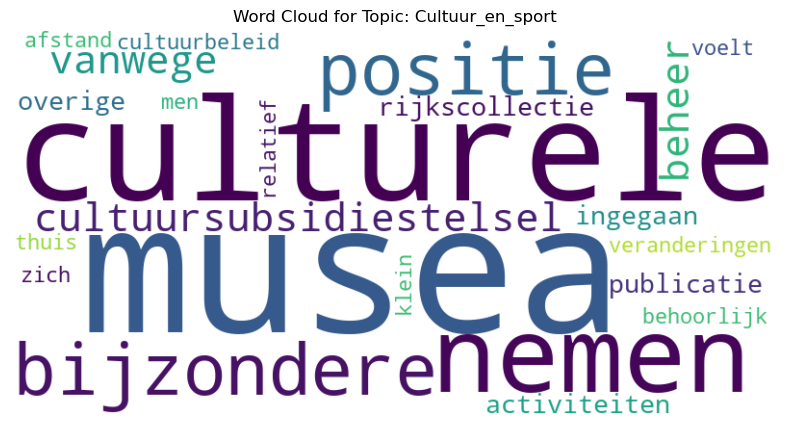

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# ---- 1. Load your dataset here ----
# For example:
sent_df = pd.read_csv("bertje_policy_predictions_with_embeddings_2015.csv")  # <--- Set your file here

def clean_text(text):
    text = re.sub(r'\d+', ' ', str(text))
    text = re.sub(r'[^\w\s]', ' ', text)
    text = text.lower()
    words = [word for word in text.split() if word not in custom_stopwords]
    return ' '.join(words)

# ---- 3. Clean your text column ----
sent_df['cleaned_sentence'] = sent_df['sentence'].apply(clean_text)

# ---- 4. Set your topic column name here ----
topic_col = 'topic'  # <-- Change if your topic column is named differently

topics = sent_df[topic_col].unique()

# ---- 5. Generate word clouds for each topic ----
for topic in topics:
    text = ' '.join(sent_df.loc[sent_df[topic_col] == topic, 'cleaned_sentence'])
    if not text.strip():
        continue
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=custom_stopwords, collocations=False).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Topic: {topic}')
    plt.show()


In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Filter sentences by topic
policy_2015_centroid = pd.read_csv('policy_2015_centroid.csv')
slavery_2015_centroid = pd.read_csv('slavery_2015_centroid.csv')

policy_subset = policy_2015_centroid[policy_2015_centroid['topic_centroid'] == 'onderwijs'].copy()
slavery_subset = slavery_2015_centroid[slavery_2015_centroid['topic_centroid'] == 'Historical_colonialism/Slavery'].copy()

# Add group label
policy_subset['group'] = 'onderwijs'
slavery_subset['group'] = 'historical_colonialism/slavery'

# Combine
combined = pd.concat([policy_subset, slavery_subset], ignore_index=True)

import ast

def parse_embedding(val):
    if isinstance(val, str):
        return np.array(ast.literal_eval(val))
    return np.array(val)

embeddings = np.array([parse_embedding(vec) for vec in combined['embedding']])



In [14]:
# Reduce to 2D for scatterplot
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

combined['pc1'] = reduced[:, 0]
combined['pc2'] = reduced[:, 1]


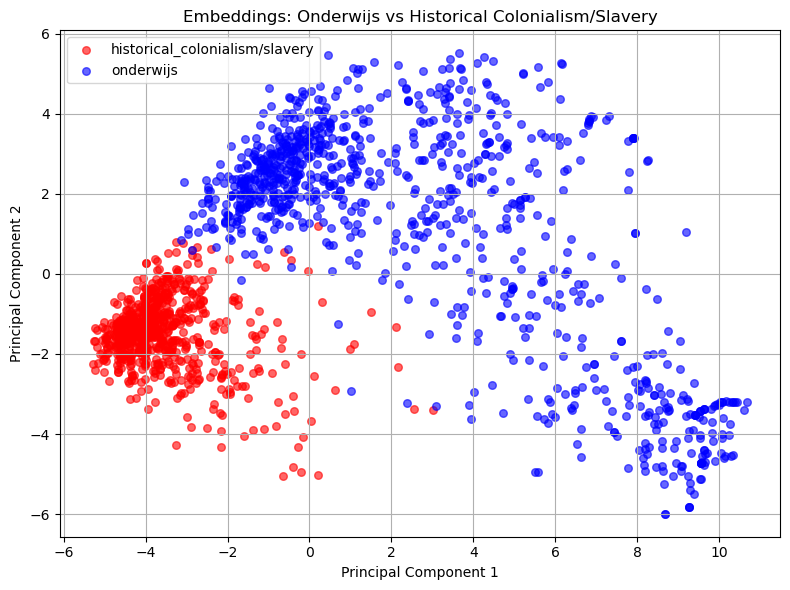

In [15]:
plt.figure(figsize=(8,6))
colors = {'onderwijs':'blue', 'historical_colonialism/slavery':'red'}

for group, group_df in combined.groupby('group'):
    plt.scatter(group_df['pc1'], group_df['pc2'], 
                label=group, alpha=0.6, s=30, color=colors[group])

plt.title("Embeddings: Onderwijs vs Historical Colonialism/Slavery")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
import plotly.express as px

# Select top 30 from each group (change criteria if you want e.g. highest score, longest, etc.)
policy_top = combined[combined['group'] == 'onderwijs'].head(200)
slavery_top = combined[combined['group'] == 'historical_colonialism/slavery'].head(200)

top_combined = pd.concat([policy_top, slavery_top], ignore_index=True)


In [ ]:
fig = px.scatter(
    top_combined,
    x='pc1', y='pc2',
    color='group',
    hover_data={'sentence': True, 'group': True, 'pc1': False, 'pc2': False},
    labels={'group': 'Groep'},
    title='Education vs Historical Colonialism/Slavery'
)

fig.update_traces(marker=dict(size=12, opacity=0.7), selector=dict(mode='markers'))
fig.update_layout(
    width=900,
    height=600,
    legend_title_text='Categorie',
    hoverlabel=dict(bgcolor="white", font_size=12)
)

fig.show()
